In [17]:
import numpy as np
from scipy import linalg
import os
import matplotlib.pyplot as plt 
%matplotlib inline

# Eigenvalues and Power Iterations

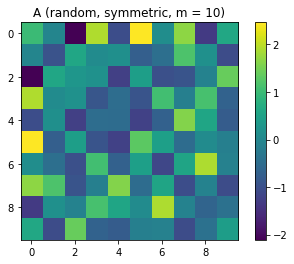

True eigenvalues of A:
[-5.22485246 -3.80429702 -2.59860575 -1.79909873 -0.71376482  0.45976395
  0.71226379  1.88713376  4.13480338  4.85905402]


In [197]:
'''
a) Generate a random, symmetric m x m matrix A, where m = 10 
'''
m = 10 
A = np.random.randn(m, m)
A = np.triu(A) + np.triu(A, 1).T

# Visualize A 
plt.figure()
plt.title('A (random, symmetric, m = {})'.format(m))
plt.imshow(A)
plt.colorbar()
plt.show()

# Display the ground truth eigenvalues of A 
eigenvals = np.sort(linalg.eigh(A)[0])
print('True eigenvalues of A:')
print(eigenvals)

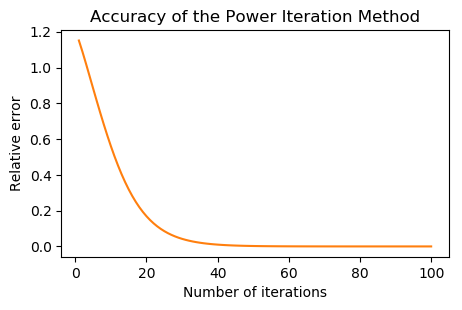

In [198]:
'''
b) Find the largest eigenvalue with the power iteration method. 
Compare the accuracy of the method as a function of iterations.
'''

# Define iteration values to investigate 
itr_min = 1
itr_max = 100
itr_step = 1
iteration_values = np.arange(itr_min, itr_max + itr_step, itr_step)

# Get the eigenvalue that the power iteration method should retrieve 
max_eig = eigenvals[-1]
if (np.absolute(eigenvals[0]) > np.absolute(max_eig)):
    max_eig = eigenvals[0]
    
error = np.empty(len(iteration_values))
for i, itr in enumerate(iteration_values):
    
    # Perform the power iteration method 
    λ = 0
    v = np.eye(m)[:, 0] # initial guess for v = e_1
    for k in range(itr):
        w = A @ v 
        v = w / linalg.norm(w)
        λ = v.T @ A @ v 
        
    # Record the relative error of the eigenvalue that the power iteration converged to
    error[i] = linalg.norm(max_eig - λ) / linalg.norm(max_eig)

# Plot results
plt.figure(figsize=(5, 3), dpi=100)
plt.title('Accuracy of the Power Iteration Method')
plt.plot(iteration_values, error, c='tab:orange')
plt.xlabel('Number of iterations')
plt.ylabel('Relative error')
plt.show()

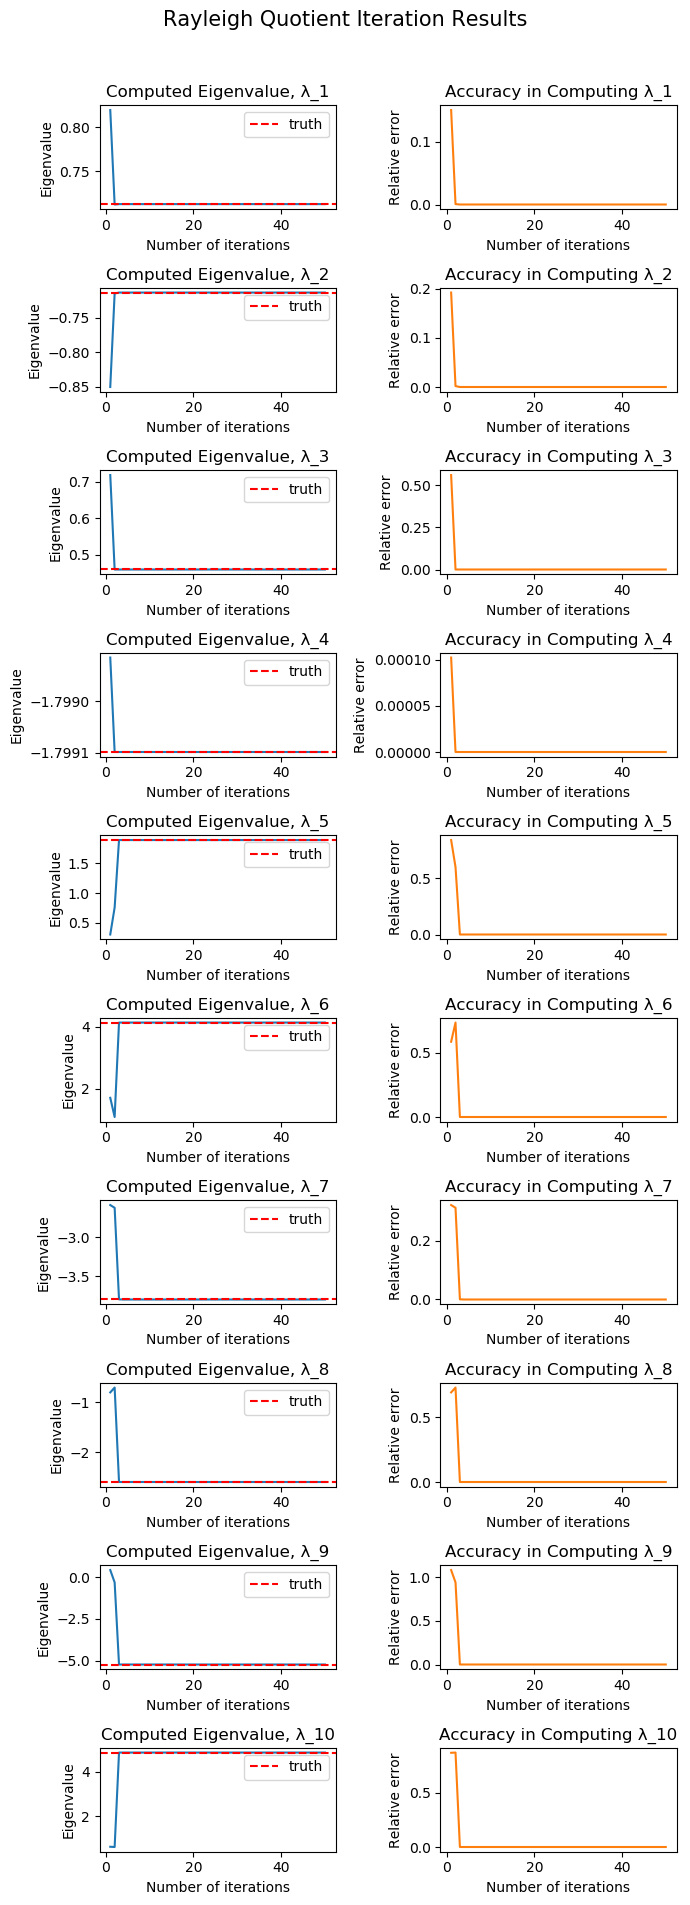

In [199]:
'''
c) Find all ten eigenvalues by the Rayleigh Quotient iteration and guessing initial eigenvectors
Compare the accuracy of the method as a function of iterations
'''

# Define iteration values to investigate 
itr_min = 1
itr_max = 50
itr_step = 1
iteration_values = np.arange(itr_min, itr_max + itr_step, itr_step)

# Define the identity matrix I 
I = np.eye(m)

# Store all computed eigenvalues for each value of k
all_eigs = np.empty((m, len(iteration_values)))

for i, itr in enumerate(iteration_values):
    # Eigenvectors computed 
    eigenvecs_comp = np.empty((m, m))
    # Eigenvalues computed 
    eigenvals_comp = np.empty(m)
    
    for j in range(m): 
        # Initial guess for v_j = e_j
        v = I[:, j] 
        
        # Choose v_j such that v_j is orthogonal to all
        # other computed eigenvectors 
        for k in range(j): 
            eig_k = eigenvecs_comp[:, k]
            v = v - (np.dot(eig_k, v) * eig_k)
            
        # Normalize 
        v = v / linalg.norm(v)
        
        # Initial guess for λ_j
        λ = v.T @ A @ v 

        # Perform the Rayleigh Quotient iteration
        for l in range(itr):
            w = linalg.inv(A - (λ * I)) @ v 
            # Ensure that v remains orthogonal to all
            # other computed eigenvectors 
            for k in range(j): 
                eig_k = eigenvecs_comp[:, k]
                w = w - (np.dot(eig_k, v) * eig_k)
            v = w / linalg.norm(w)
            λ = v.T @ A @ v 

        eigenvals_comp[j] = λ
        eigenvecs_comp[:, j] = v
        
    all_eigs[:, i] = eigenvals_comp
    
# All relative errors of the eigenvalue that the Rayleigh Quotient iteration converged to 
all_errors = np.empty((m, len(iteration_values)))
truth_vals = np.empty(m)
for i in range(m):
    # Eigenvalue λ_i computed for each iteration value 
    computed = all_eigs[i, :]
    
    # Choose the ground truth eigenvalue that λ_i is closest to
    truth = eigenvals[0]
    diff = linalg.norm(truth - computed[-1]) / linalg.norm(truth)
    for j in range(1, m):
        diff_2 = linalg.norm(eigenvals[j] - computed[-1]) / linalg.norm(eigenvals[j])
        if (diff_2 < diff):
            truth = eigenvals[j]
            diff = linalg.norm(truth - computed[-1]) / linalg.norm(truth)
    truth_vals[i] = truth
            
    # Compute error in computing λ_i
    errors = np.empty(len(iteration_values))
    for k in range(len(iteration_values)):
        errors[k] = linalg.norm(truth - computed[k]) / linalg.norm(truth)
    all_errors[i, :] = errors
    
# Plot results 
plt.figure(figsize=(7, 20), dpi=100)
plt.suptitle('Rayleigh Quotient Iteration Results', fontsize=15)

for i in range(m):
    plt.subplot(m, 2, (2 * i) + 1)
    plt.title('Computed Eigenvalue, λ_{}'.format(i + 1))
    plt.plot(iteration_values, all_eigs[i, :])
    plt.axhline(y=truth_vals[i], c='r', linestyle='--', label='truth')
    plt.xlabel('Number of iterations')
    plt.ylabel('Eigenvalue')
    plt.legend()
    
    plt.subplot(m, 2, (2 * i) + 2)
    plt.title('Accuracy in Computing λ_{}'.format(i + 1))
    plt.plot(iteration_values, all_errors[i, :], c='tab:orange')
    plt.xlabel('Number of iterations')
    plt.ylabel('Relative error')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

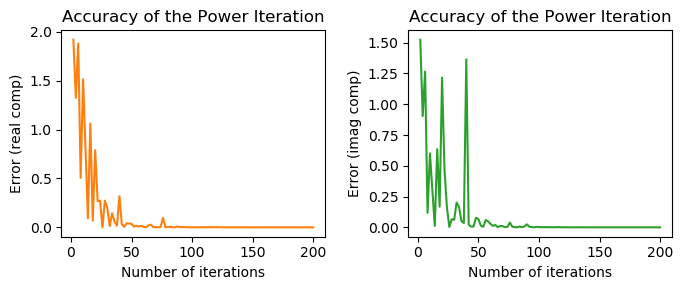

In [18]:
'''
d) Analysis on a matrix, not necessarily symmetric 
'''
'''
Generate a random m x m matrix A, where m = 10 
'''
m = 10 
A = np.random.randn(m, m)
I = np.eye(m)
eigenvals = linalg.eig(A)[0] # Ground truth eigenvalues of A 

'''
Find the largest eigenvalue with the power iteration method. 
Compare the accuracy of the method as a function of iterations.
'''
# Define iteration values to investigate 
itr_min = 2
itr_max = 200
itr_step = 2
iteration_values = np.arange(itr_min, itr_max + itr_step, itr_step)

# Get the eigenvalue that the power iteration method should retrieve 
max_eig = eigenvals[0]
for i in range(1, m):
    if (np.absolute(eigenvals[i]) > np.absolute(max_eig)):
        max_eig = eigenvals[i]
    
error_r = np.empty(len(iteration_values))
error_i = np.empty(len(iteration_values))

for i, itr in enumerate(iteration_values):

    # Perform the power iteration method 
    λ = 0
    v = np.random.randn(m) + (np.random.randn(m) * 1j) # initial guess for v 
    v = v / linalg.norm(v)
    
    for k in range(itr):
        w = A @ v 
        v = w / linalg.norm(w)
        λ = np.conjugate(v).T @ A @ v 
        
    # Record the relative error of the eigenvalue that the power iteration converged to
    error_r[i] = linalg.norm(max_eig.real - λ.real)
    error_i[i] = linalg.norm(max_eig.imag - λ.imag)

# Plot results
plt.figure(figsize=(7, 3), dpi=100)
plt.subplot(1, 2, 1)
plt.title('Accuracy of the Power Iteration')
plt.plot(iteration_values, error_r, c='tab:orange')
plt.xlabel('Number of iterations')
plt.ylabel('Error (real comp)')
plt.subplot(1, 2, 2)
plt.title('Accuracy of the Power Iteration')
plt.plot(iteration_values, error_i, c='tab:green')
plt.xlabel('Number of iterations')
plt.ylabel('Error (imag comp)')
plt.tight_layout()
plt.show()

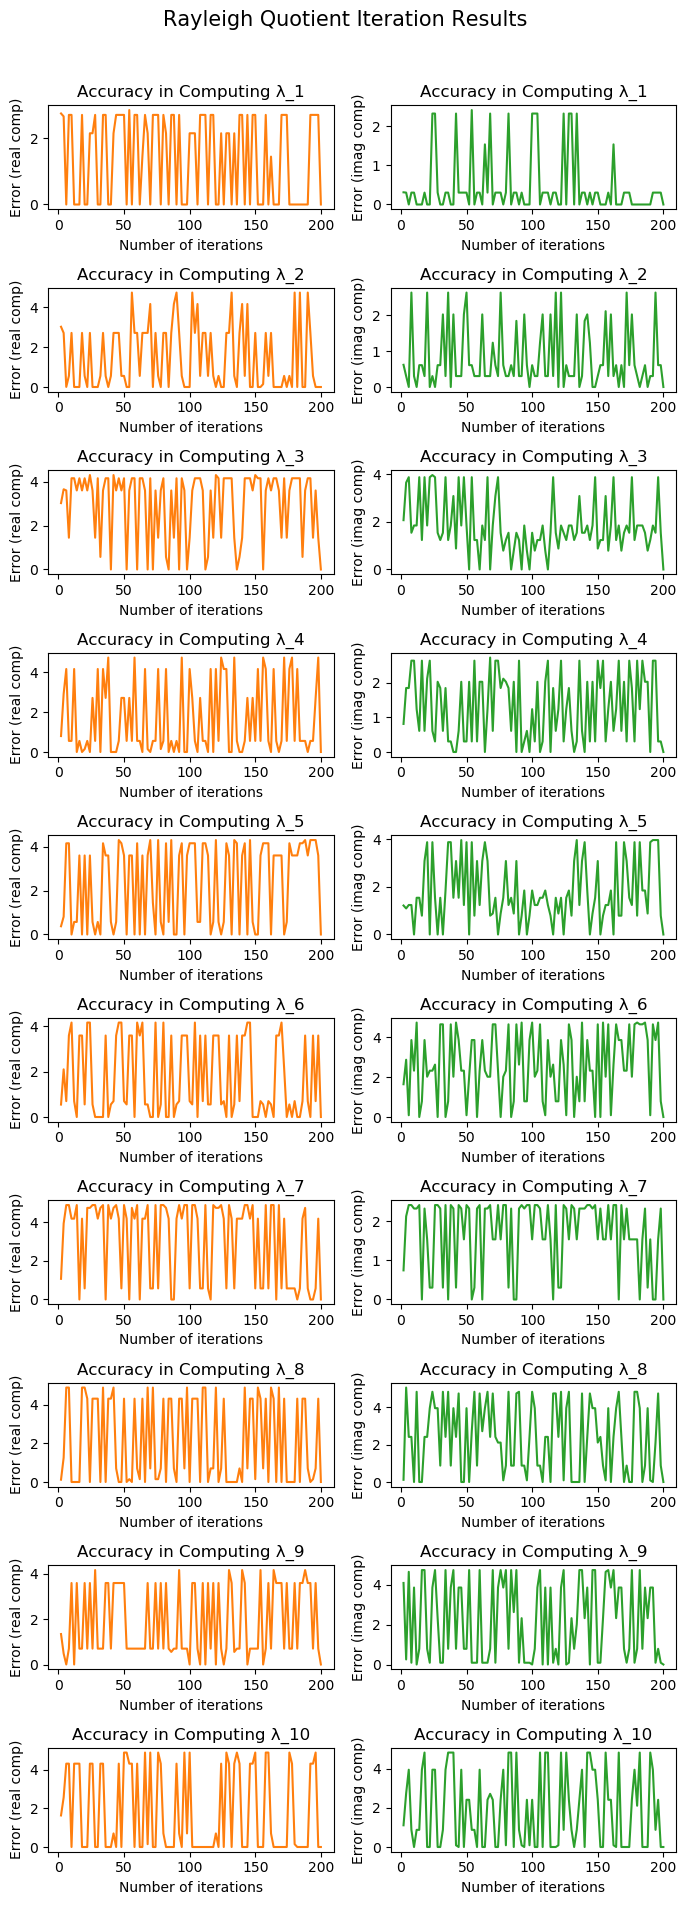

In [19]:
'''
d) (continued)
Find all ten eigenvalues by the Rayleigh Quotient iteration and guessing initial eigenvectors
Compare the accuracy of the method as a function of iterations
'''
# Define iteration values to investigate 
itr_min = 2
itr_max = 200
itr_step = 2
iteration_values = np.arange(itr_min, itr_max + itr_step, itr_step)

# Store all computed eigenvalues for each value of k
all_eigs = np.empty((m, len(iteration_values)), dtype='complex')

for i, itr in enumerate(iteration_values):
    # Eigenvectors computed 
    eigenvecs_comp = np.empty((m, m), dtype='complex')
    # Eigenvalues computed 
    eigenvals_comp = np.empty(m, dtype='complex')
    
    for j in range(m): 
        # Initial guess for v_j
        v = np.random.randn(m) + (np.random.randn(m) * 1j)
        v = v / linalg.norm(v)
        
        # Choose v_j such that v_j is orthogonal to all
        # other computed eigenvectors 
        for k in range(j): 
            eig_k = eigenvecs_comp[:, k]
            v = v - (np.dot(np.conjugate(eig_k), v) * eig_k)
            
        # Normalize 
        v = v / linalg.norm(v)
        
        # Initial guess for λ_j
        λ = np.conjugate(v).T @ A @ v 

        # Perform the Rayleigh Quotient iteration
        for l in range(itr):
            w = linalg.inv(A - (λ * I)) @ v 
            # Ensure that v remains orthogonal to all
            # other computed eigenvectors 
            for k in range(j): 
                eig_k = eigenvecs_comp[:, k]
                w = w - (np.dot(np.conjugate(eig_k), w) * eig_k)
            v = w / linalg.norm(w)
            λ = np.conjugate(v).T @ A @ v 

        eigenvals_comp[j] = λ
        eigenvecs_comp[:, j] = v
        
    all_eigs[:, i] = eigenvals_comp
    
# All relative errors of the eigenvalue that the Rayleigh Quotient iteration converged to 
all_errors_r = np.empty((m, len(iteration_values)))
all_errors_i = np.empty((m, len(iteration_values)))
truth_vals = np.empty(m, dtype='complex')
for i in range(m):
    # Eigenvalue λ_i computed for each iteration value 
    computed = all_eigs[i, :]
    
    # Choose the ground truth eigenvalue that λ_i is closest to
    truth = eigenvals[0]
    diff = linalg.norm(truth - computed[-1])
    for j in range(1, m):
        diff_2 = linalg.norm(eigenvals[j] - computed[-1])
        if (diff_2 < diff):
            truth = eigenvals[j]
            diff = linalg.norm(truth - computed[-1])
    truth_vals[i] = truth
            
    # Compute error in computing λ_i
    errors_r = np.empty(len(iteration_values))
    errors_i = np.empty(len(iteration_values))
    for k in range(len(iteration_values)):
        errors_r[k] = linalg.norm(truth.real - computed[k].real)
        errors_i[k] = linalg.norm(truth.imag - computed[k].imag)
    all_errors_r[i, :] = errors_r
    all_errors_i[i, :] = errors_i
    
# Plot results
plt.figure(figsize=(7, 20), dpi=100)
plt.suptitle('Rayleigh Quotient Iteration Results', fontsize=15)

for i in range(m):
    plt.subplot(m, 2, (2 * i) + 1)
    plt.title('Accuracy in Computing λ_{}'.format(i + 1))
    plt.plot(iteration_values, all_errors_r[i, :], c='tab:orange')
    plt.xlabel('Number of iterations')
    plt.ylabel('Error (real comp)')
    
    plt.subplot(m, 2, (2 * i) + 2)
    plt.title('Accuracy in Computing λ_{}'.format(i + 1))
    plt.plot(iteration_values, all_errors_i[i, :], c='tab:green')
    plt.xlabel('Number of iterations')
    plt.ylabel('Error (imag comp)')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

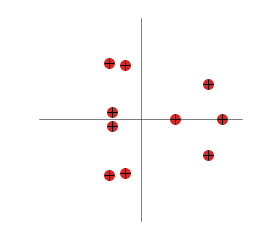

In [21]:
# Plot computed eigenvalues and true eigenvalues on complex plane
k = 4

plt.figure(figsize=(4, 4))
plt.plot([0, 0],[-1.1 * k, 1.1 * k], 'k', linewidth=0.5)
plt.plot([-1.1 * k, 1.1 * k], [0, 0], 'k', linewidth=0.5)
plt.axis('equal')
plt.axis('off')
for i in range(m):
    eig_comp = all_eigs[i, -1]
    plt.plot(eig_comp.real, eig_comp.imag, 'o', c='tab:red', markersize=10, label='Computed')
for i in range(m):
    eig_true = eigenvals[i]
    plt.plot(eig_true.real, eig_true.imag, '+', c='k', markersize=10, label='Truth')
plt.show()

# Yale Faces

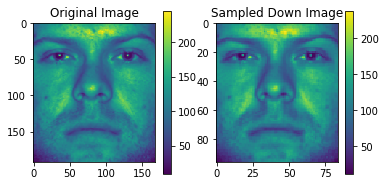

In [2]:
'''
IMPORT THE DATA 
'''
# Folder location of cropped images
# Note: yalefaces_cropped contains subdirectories, where each
# subdirectory contains images of their respective person
crop_images = 'yalefaces_cropped/'

# Sample the image data down by averaging each dxd grid of pixels per image
# Data must be shaped such that data.shape = (rows, cols, images)
def sample_down(data, d=2):
    down_sampled_data = np.empty((data.shape[0]//d, data.shape[1]//d, data.shape[2]))
    for i in range(0, data.shape[0], d): 
        for j in range(0, data.shape[1], d):
            pixels = data[i:i+d, j:j+d, :].reshape(d**2, -1)
            down_sampled_data[i//d, j//d, :] = np.average(pixels, axis=0)
    return down_sampled_data

# List of all pictures in yalefaces_cropped
pics = []

# Examine all subdirectories 
for sub_dir in os.listdir(crop_images):
    
    # Examine all images in each subdirectory 
    for file in os.listdir(crop_images + sub_dir):
        pic = plt.imread(crop_images + sub_dir + '/' + file)
        pics.append(pic)
        
# Get data dimensions 
rows = pics[0].shape[0]
cols = pics[0].shape[1]
num_pics = len(pics)

# Convert picture list to numpy array
# (Each column of X corresponds with an image)
X = np.array(pics)
X = X.reshape(num_pics, -1).T

# Sample the data down 
X_ds = sample_down(X.reshape(rows, cols, -1))
rows_ds = X_ds.shape[0]
cols_ds = X_ds.shape[1]
X_ds = X_ds.reshape(rows_ds * cols_ds, -1)

# Display an original image versus its down-sampled version
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(X[:, 0].reshape(rows, cols))
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Sampled Down Image')
plt.imshow(X_ds[:, 0].reshape(rows // 2, cols // 2))
plt.colorbar()
plt.show()

In [312]:
'''
a) Power iterate on the correlation matrix to find the dominant eigenvector and eigenvalue
Compare it to the leading order SVD mode.
'''

# Correlation matrix for the down-sampled data 
C = X_ds @ X_ds.T

# Choose number of iterations for the power iteration
itr = 500

# Power iterate on the correlation matrix 
v_pow = np.eye(C.shape[0])[:, 0] # initial guess for v = e_1
λ_pow = 0
for k in range(itr):
    w = C @ v_pow
    v_pow = w / linalg.norm(w)
    λ_pow = v_pow.T @ C @ v_pow
    
# Compare it to the leading order SVD mode
U, Σ, Vh = linalg.svd(C, full_matrices=False)

Power iteration eigenvalue:
122735967209.04898
Largest singular value:
122735967209.04893


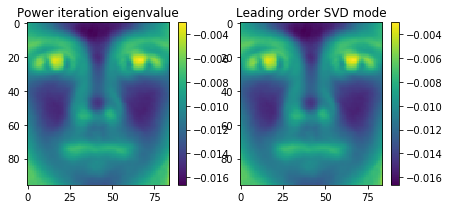

In [315]:
# Print results 
print('Power iteration eigenvalue:')
print(λ_pow)

print('Largest singular value:')
print(Σ[0])

plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
plt.title('Power iteration eigenvalue')
plt.imshow(-v_pow.reshape(rows_ds, cols_ds))
plt.colorbar()
plt.subplot(1, 2, 2)
plt.title('Leading order SVD mode')
plt.imshow(U[:, 0].reshape(rows_ds, cols_ds))
plt.colorbar()
plt.show()

In [3]:
'''
b) Use randomized sampling to reproduce the SVD matrices: U, Σ and V 
'''
m = X.shape[0]
n = X.shape[1]
k = 10 # Here, we'll use k = 10 

Ω = np.random.randn(n, k)
Y = X @ Ω
Q, R = linalg.qr(Y, mode='economic')

B = Q.T @ X
u, s, vh = linalg.svd(B, full_matrices=False)

# Get estimates of U, Σ and V
U_est = Q @ u
Σ_est = s
Vh_est = vh

k = 10


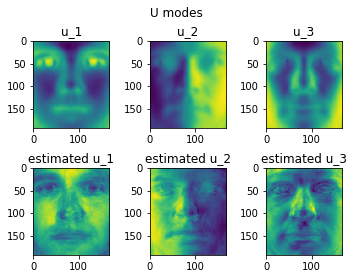

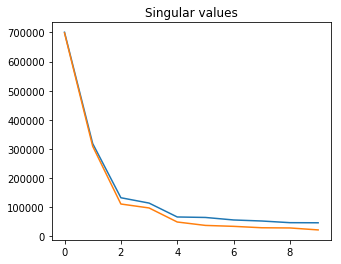

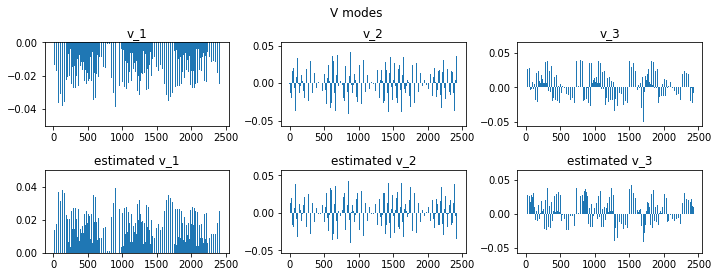

k = 20


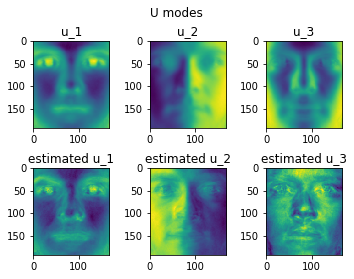

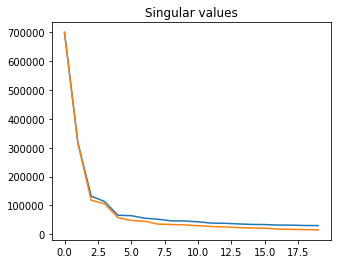

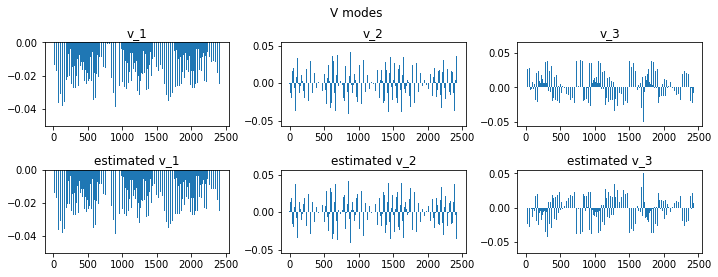

k = 30


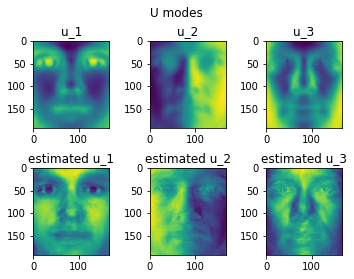

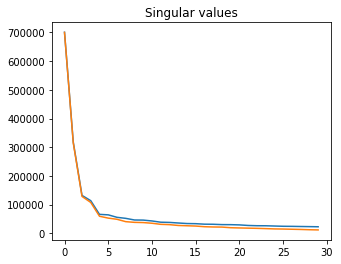

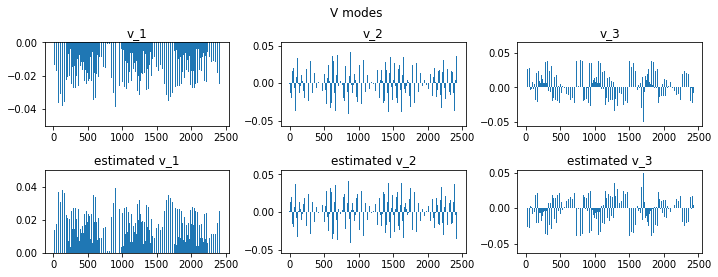

k = 40


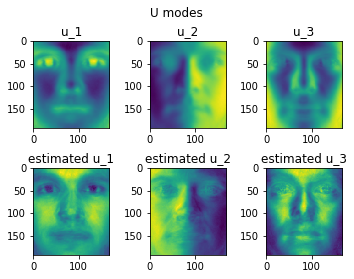

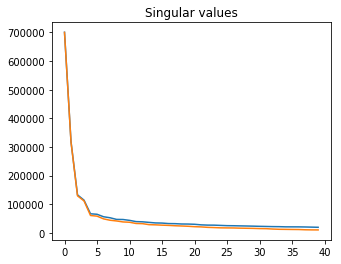

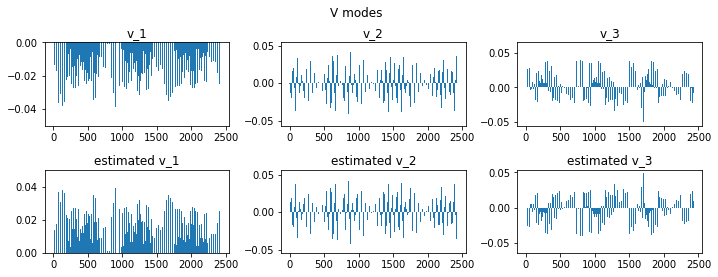

k = 50


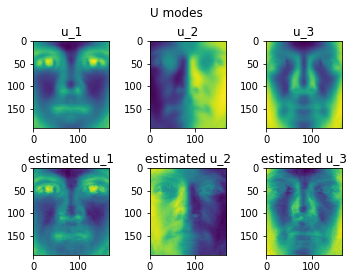

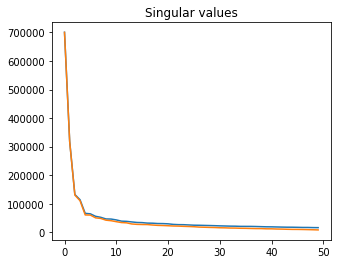

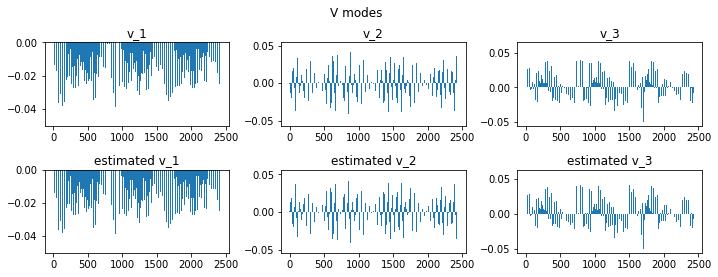

k = 60


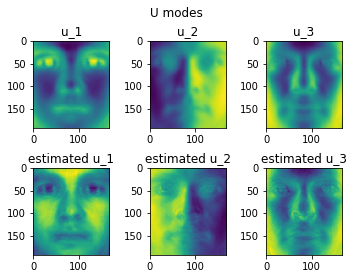

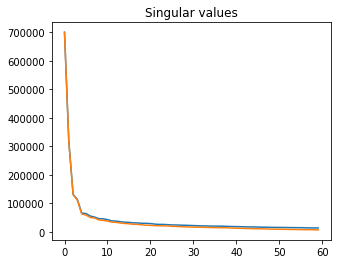

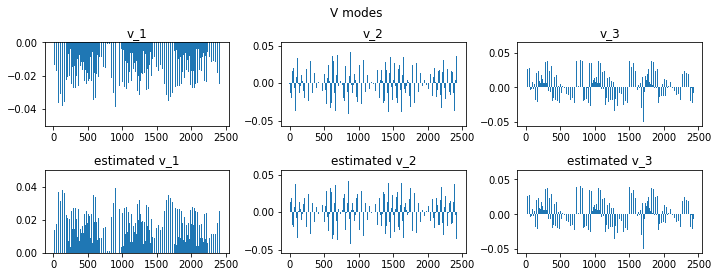

k = 70


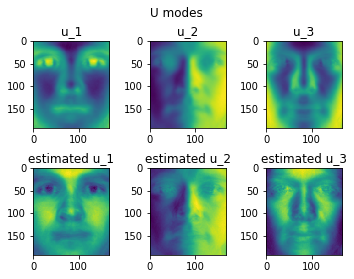

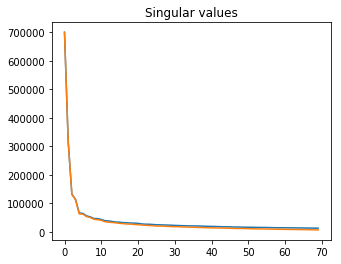

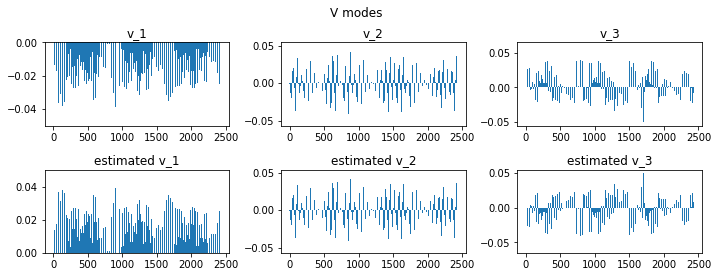

k = 80


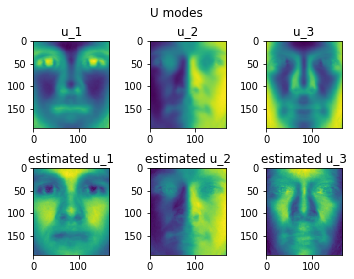

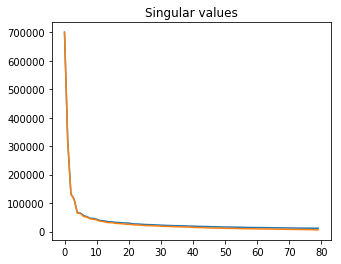

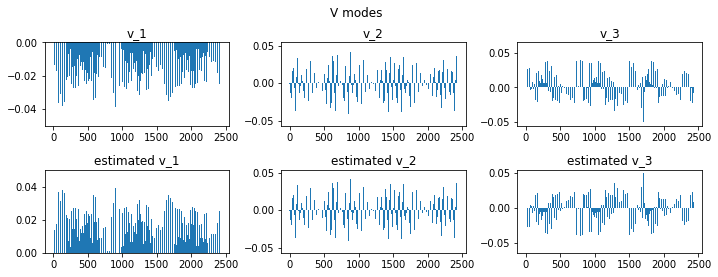

k = 90


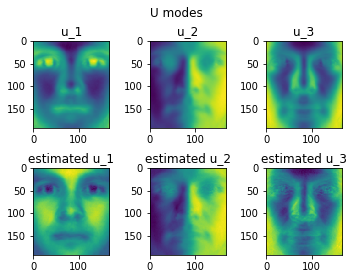

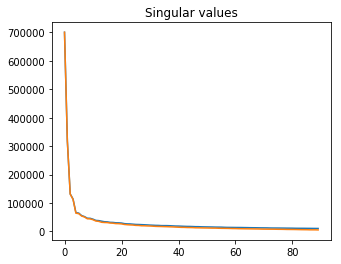

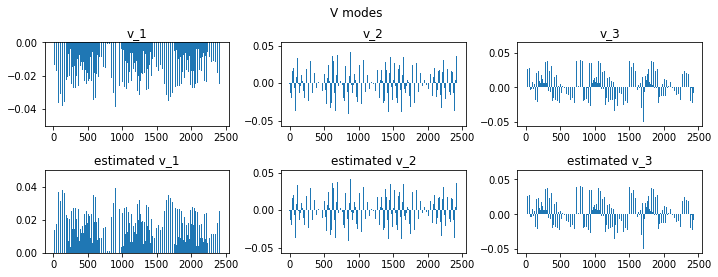

k = 100


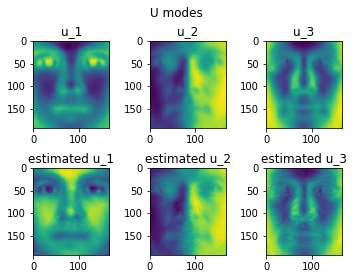

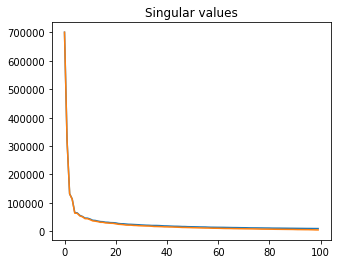

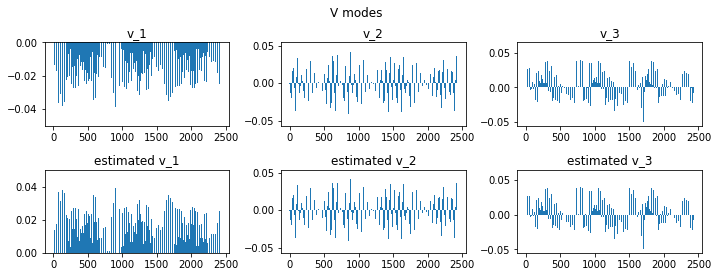

In [14]:
'''
c) Compare the randomized modes to the true modes along with the singular value decay as a function of
the number of randomized samples.
'''
# Ground truth SVD of X 
U, Σ, Vh = linalg.svd(X, full_matrices=False)

# Choose k values to investigate 
k_min = 10
k_max = 100
k_step = 10
k_vals = np.arange(k_min, k_max + k_step, k_step)

m = X.shape[0]
n = X.shape[1]

num_cols = 3 # Number of modes of U, V to observe 

u_errors = np.empty((num_cols, len(k_vals)))
s_errors = np.empty(len(k_vals))
v_errors = np.empty((num_cols, len(k_vals)))

for j, k in enumerate(k_vals):
    Ω = np.random.randn(n, k)
    Y = X @ Ω
    Q, R = linalg.qr(Y, mode='economic')
    B = Q.T @ X
    u, s, vh = linalg.svd(B, full_matrices=False)
    # Get estimates of U, Σ and V
    U_est = Q @ u
    Σ_est = s
    Vh_est = vh
    
    print('k = {}'.format(k))
    plt.figure(figsize=(5, 4))
    plt.suptitle('U modes')
    for i in range(num_cols):
        u_errors[i, j] = linalg.norm(U[:, i] - U_est[:, i]) / linalg.norm(U[:, i])
        plt.subplot(2, num_cols, i + 1)
        plt.title('u_{}'.format(i + 1))
        plt.imshow(U[:, i].reshape(rows, cols))
    for i in range(num_cols):
        plt.subplot(2, num_cols, i + num_cols + 1)
        plt.title('estimated u_{}'.format(i + 1))
        plt.imshow(U_est[:, i].reshape(rows, cols))
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
    plt.figure(figsize=(5, 4))
    s_errors[j] = linalg.norm(Σ[:k] - Σ_est) / linalg.norm(Σ[:k])
    plt.title('Singular values')
    plt.plot(Σ[:k], label='Truth')
    plt.plot(Σ_est, label='Estimated')
    plt.show()
    
    plt.figure(figsize=(10, 4))
    plt.suptitle('V modes')
    for i in range(num_cols):
        v_errors[i, j] = linalg.norm(Vh[i, :] - Vh_est[i, :]) / linalg.norm(Vh[i, :])
        plt.subplot(2, num_cols, i + 1)
        plt.title('v_{}'.format(i + 1))
        plt.bar(np.arange(n), Vh[i, :])
    for i in range(num_cols):
        plt.subplot(2, num_cols, i + num_cols + 1)
        plt.title('estimated v_{}'.format(i + 1))
        plt.bar(np.arange(n), Vh_est[i, :])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

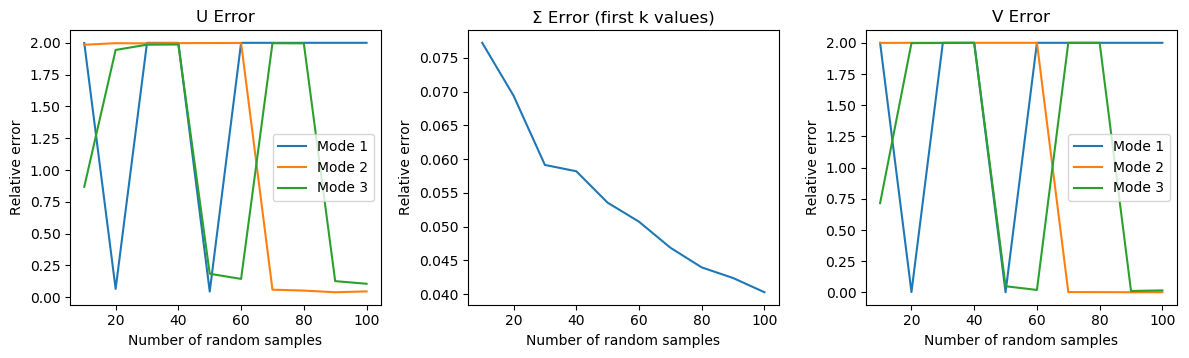

In [23]:
# Plot error results 
plt.figure(figsize=(12, 4), dpi=100)
plt.subplot(1, 3, 1)
plt.title('U Error')
for i in range(num_cols):
    plt.plot(k_vals, u_errors[i, :], label='Mode {}'.format(i + 1))
plt.xlabel('Number of random samples')
plt.ylabel('Relative error')
plt.legend()

plt.subplot(1, 3, 2)
plt.title('Σ Error (first k values)')
plt.plot(k_vals, s_errors)
plt.xlabel('Number of random samples')
plt.ylabel('Relative error')

plt.subplot(1, 3, 3)
plt.title('V Error')
for i in range(num_cols):
    plt.plot(k_vals, v_errors[i, :], label='Mode {}'.format(i + 1))
plt.xlabel('Number of random samples')
plt.ylabel('Relative error')
plt.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()